In [6]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
def bandpass_coeff(low, high, fs, order):
        """
        Function to calculate filter coefficients
        """
        nyq = 0.5*fs
        low = low / nyq
        high = high / nyq
        sos = signal.butter(order, [low, high], btype='bandpass', output='sos')
        return sos

In [3]:
data = pd.read_csv('data.csv')
data.to_csv('data1.csv', header = False)
data = pd.read_csv("data1.csv")

In [4]:
data.head()

,Timestamp,EEG.Counter,EEG.Interpolated,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,...,EQ.T7,EQ.P7,EQ.O1,EQ.O2,EQ.P8,EQ.T8,EQ.FC6,EQ.F4,EQ.F8,EQ.AF4
0,1.638428e+09,85.0,0.0,4218.717773,4304.743652,4117.692383,4174.487305,4272.436035,4294.487305,4284.871582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.638428e+09,86.0,0.0,4223.461426,4318.205078,4125.384766,4169.743652,4271.282227,4292.563965,4292.563965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.638428e+09,87.0,0.0,4228.846191,4323.589844,4137.948730,4180.128418,4275.256348,4302.692383,4309.358887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.638428e+09,88.0,0.0,4220.384766,4309.230957,4125.384766,4187.179688,4281.666504,4304.230957,4304.358887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.638428e+09,89.0,0.0,4205.128418,4300.897461,4101.153809,4162.307617,4272.948730,4287.692383,4283.205078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
def highpass_coeff(low, fs, order):
        """
        Function to calculate filter coefficients
        """
        nyq = 0.5*fs
        low = low / nyq
        sos = signal.butter(order, low, btype='highpass', output='sos')
        return sos

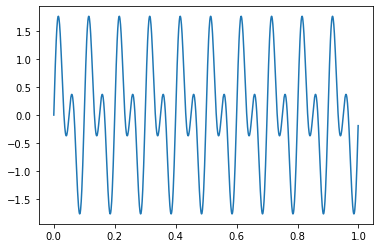

In [12]:
t = np.linspace(0, 1, 1000, False)
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
plt.plot(t,sig)

In [13]:
sos = signal.butter(3, 15, 'hp', fs=1000, output='sos')

In [10]:
sos

array([[ 0.91002543, -0.91002543,  0.        ,  1.        , -0.90992999,
         0.        ],
       [ 1.        , -2.        ,  1.        ,  1.        , -1.90164369,
         0.91012087]])

In [14]:
filtered = signal.sosfilt(sos, sig)

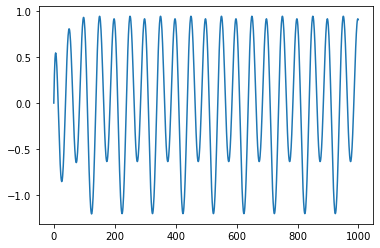

In [15]:
plt.plot(filtered)

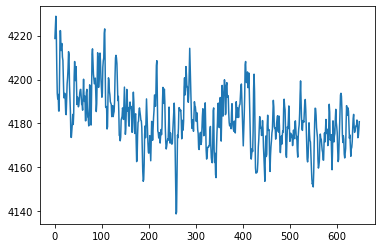

In [17]:
plt.plot(data['EEG.AF3'])

In [20]:
sos = bandpass_coeff(12,20,128,4)

In [21]:
sos

array([[ 9.33498613e-04,  1.86699723e-03,  9.33498613e-04,
         1.00000000e+00, -1.10528015e+00,  6.70102919e-01],
       [ 1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         1.00000000e+00, -1.32083417e+00,  7.12714773e-01],
       [ 1.00000000e+00, -2.00000000e+00,  1.00000000e+00,
         1.00000000e+00, -1.04660419e+00,  8.39450507e-01],
       [ 1.00000000e+00, -2.00000000e+00,  1.00000000e+00,
         1.00000000e+00, -1.55730594e+00,  8.86914513e-01]])

In [27]:
filtered = signal.sosfilt(sos, data['EEG.AF3'])

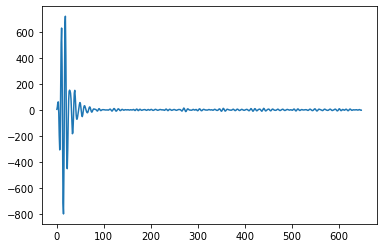

In [28]:
plt.plot(filtered)

In [32]:
str = '25 56'
list = str.split()
f1 = int(list[0])
f2 = int(list[1])

In [31]:
f1

25

In [33]:
f2

56

In [36]:
filtered.shape

(649,)

In [37]:
filtered

array([ 3.93816719e+00,  2.37516726e+01,  5.83750036e+01,  6.11228577e+01,
       -3.02824886e+01, -1.98736465e+02, -3.07257372e+02, -1.97946576e+02,
        1.42186551e+02,  5.13952463e+02,  6.28327988e+02,  3.35888321e+02,
       -2.27855938e+02, -7.13276643e+02, -7.99206507e+02, -4.22047115e+02,
        1.81887669e+02,  6.45717655e+02,  7.19137999e+02,  4.13820210e+02,
       -4.10397655e+01, -3.76222390e+02, -4.52072669e+02, -3.09005215e+02,
       -9.15186534e+01,  7.24019711e+01,  1.42307506e+02,  1.51345022e+02,
        1.43846418e+02,  1.28701395e+02,  8.38043930e+01, -4.60806281e+00,
       -1.11813660e+02, -1.83267738e+02, -1.73955677e+02, -8.40416169e+01,
        3.85834668e+01,  1.29872571e+02,  1.49930769e+02,  1.02891677e+02,
        2.59294654e+01, -3.94824187e+01, -7.12295432e+01, -7.11596056e+01,
       -5.34825578e+01, -3.02661447e+01, -5.50760676e+00,  2.05329405e+01,
        4.40510222e+01,  5.60353485e+01,  4.81660925e+01,  2.06170245e+01,
       -1.55317583e+01, -